# Basic libraries for data analisis. Math in machine learning

## Practical task. Analisys of "Titanic" passengers

In [2]:
%pylab inline
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Read from file to Pandas.DataFrame object

In [3]:
data = pd.read_csv('C:/Users/Saad/Downloads/Task_1_Pandas/Task_1/titanic.csv')

**The first 5 rows of the table:**

In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Consider first 10 elements of Parch column - ammount of parents and children on board:**

In [4]:
data['Parch'][:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: Parch, dtype: int64

**Choose passengers, who were shipping in Cherbourg (Embarked=C) and paid fare > 200.**

In [5]:
data[(data['Embarked'] == 'C') & (data['Fare'] > 200)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


In [6]:
len(data[(data['Embarked'] == 'C') & (data['Fare'] > 200)])

12

**1. How many people were survived and how many died?**

In [90]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**2. Print the distribution of the Survived variable separately for men and separately for women.**

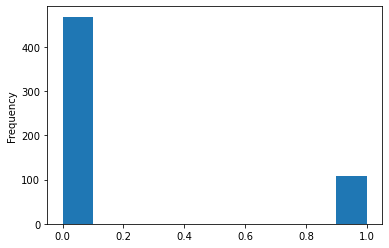

In [112]:
data[data['Sex'] == 'male']['Survived'].plot.hist(bins=10) # fix

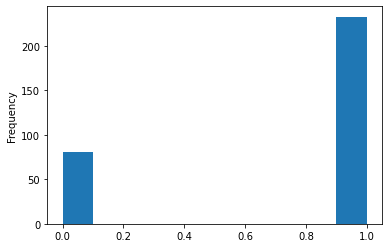

In [110]:
data[data['Sex'] == 'female']['Survived'].plot.hist(bins=10)

**3. What is the median and standard deviation of ticket prices? Also plot a histogram of ticket prices.**

In [12]:
data['Fare'].median(), data['Fare'].std()

(14.4542, 49.693428597180905)

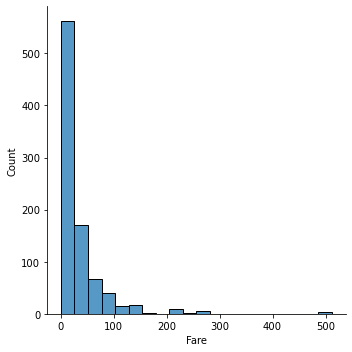

In [81]:
sns.displot(data['Fare'], bins=20)

**4. Calculate the percent of survivors among people under 25 and over 55. Calculate the average age of survivors.**

In [15]:
data[(data['Age'] < 25) | (data['Age'] > 55)]['Survived'].value_counts(normalize=True)

0    0.591195
1    0.408805
Name: Survived, dtype: float64

In [16]:
data[data['Survived'] == 1]['Age'].mean()

28.343689655172415

**5. From what city embarked the most passengers?**

In [18]:
data['Embarked'].value_counts().index[0] # Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

'S'

**6. Calculate the average age of passengers in each of the three classes.**

In [22]:
for classs in np.sort(data['Pclass'].unique()):
    avg_age = data[data['Pclass'] == classs]['Age'].mean()
    print(f'Class {classs}: {round(avg_age, 2)}')

Class 1: 38.23
Class 2: 29.88
Class 3: 25.14


**7. Compare the fare distributions of survived and dead.**

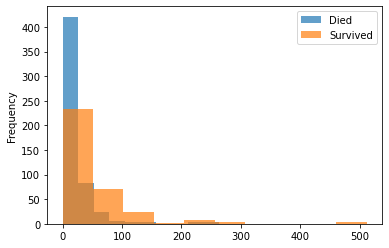

In [27]:
data[data['Survived'] == 0]['Fare'].plot.hist(alpha=0.7)
data[data['Survived'] == 1]['Fare'].plot.hist(alpha=0.7)
plt.legend(['Died', 'Survived'])

**8. Calculate the average age of surviving men who bought a ticket to Pclass 2.**

In [30]:
data[(data['Survived'] == 1) & (data['Sex'] == 'male') & (data['Pclass'] == 2)]['Age'].mean()

16.022

**9. Create a new column that will indicate whether the passenger has relatives. Calculate the correlation between it and Survived column.**

In [73]:
lookup = data['Name'].str.split(', ', expand=True)[0].value_counts()
has_relatives = []

for row in data.iterrows():
    passenger = row[1].T
    last_name = passenger['Name'].split(', ')[0]
    if lookup[last_name] > 1:
        has_relatives.append(1)
    else: 
        has_relatives.append(0)

data['hasRelatives'] = has_relatives

In [74]:
data['hasRelatives'].value_counts()

0    534
1    357
Name: hasRelatives, dtype: int64

In [75]:
data['hasRelatives'].corr(data['Survived'])

0.06108063893445912

In [82]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasRelatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0
